## Early EDA

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
nrows_to_read = 20000  # Adjust the number of rows to read since data is too big atm
movies = pd.read_csv("data/movie_data.csv",nrows = nrows_to_read)

In [5]:
movies

,_id,genres,image_url,imdb_id,imdb_link,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
0,5fc85f606758f69634496fd3,"[""Music"",""Animation""]",film-poster/4/6/4/4/4/0/464440-football-freaks...,NaN,NaN,football-freaks,Football Freaks,en,"Football crazy, football mad. Don’t watch this...",0.600,"[""United Kingdom""]",1971-12-05,0.0,[],535272.0,https://www.themoviedb.org/movie/535272/,0.0,0.0,1971.0
1,5fc85ff26758f696344ace0c,[],film-poster/2/4/5/5/0/0/245500-aftermath-0-230...,tt0586129,http://www.imdb.com/title/tt0586129/maindetails,aftermath-1960,Aftermath,en,Aftermath was the pilot for an unsold TV serie...,0.600,[],1960-04-17,22.0,[],318331.0,https://www.themoviedb.org/movie/318331/,8.0,1.0,1960.0
2,5fc85f606758f69634496fcd,"[""Drama""]",film-poster/9/3/3/1/8/93318-where-chimneys-are...,tt0045731,http://www.imdb.com/title/tt0045731/maindetails,where-chimneys-are-seen,Where Chimneys Are Seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,"[""Japan""]",1953-03-05,108.0,"[""日本語""]",117779.0,https://www.themoviedb.org/movie/117779/,6.6,10.0,1953.0
3,5fc85f606758f69634496fd1,"[""Drama""]",NaN,tt0187327,http://www.imdb.com/title/tt0187327/maindetails,the-musicians-daughter,The Musician's Daughter,en,Carl Wagner's good wife was dying. His heart b...,0.600,"[""United States of America""]",1911-12-12,15.0,[],560377.0,https://www.themoviedb.org/movie/560377/,0.0,0.0,1911.0
4,5fc85f606758f69634496fd4,"[""Documentary""]",film-poster/4/5/4/6/0/3/454603-50-years-of-fab...,tt4769914,http://www.imdb.com/title/tt4769914/maindetails,50-years-of-fabulous,50 Years of Fabulous,en,50 Years of Fabulous recounts the rich history...,0.600,[],2018-05-17,75.0,[],525187.0,https://www.themoviedb.org/movie/525187/,0.0,0.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


While we only imported 20k rows, the movies data df is actually 285,516 rows long... We will need to find a way to remove rows that don't meet certain criteria. Perhaps with less than a certain number of reviews.

The 19 columns within this table seem sufficient and provide good information, we can look at removing some unneccesary weight here too.

I see the genres, movie title, original language, popularity,Production_countries,	release_date, runtime, spoken_languages, vote_average,	vote_count, and	year_released columns as being potentialy useful.


In [59]:
ratings_df = pd.read_csv("data/ratings_export.csv")

In [19]:
ratings_df

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof
...,...,...,...,...
11078162,6239f4f1a936b95600b3d798,alien-3,6,turnitip
11078163,6239f4f1a936b95600b3d799,battleship-potemkin,7,turnitip
11078164,6239f4f1a936b95600b3d79e,pusher,6,turnitip
11078165,6239f4f1a936b95600b3d7a1,wild-strawberries,7,turnitip


**We have 11,078,167 ratings** within our data set which is more than enough. We can really jump into cleaning here... Perhaps based on users who meet criteria we will determine at a later date.

The 4 columns are sufficient to match with the other data sets

In [38]:
users_df = pd.read_csv("data/users_export.csv")

users_df

,_id,display_name,num_ratings_pages,num_reviews,username
0,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650,deathproof
1,5fc4172ec6cd28ebd99dd0ea,Matt Singer,52.0,1915,superpulse
2,5fc4172ec6cd28ebd99dd0ed,Sean Baker,21.0,1283,lilfilm
3,5fc4172ec6cd28ebd99dd0ee,iana,37.0,1177,ianamurray
4,5fc419171ebf67b9fbe48615,Lizzy,57.0,1810,punchdrunklizzy
...,...,...,...,...,...
8134,6239b430a936b956009c993c,Máté Turi-Mészáros,NaN,237,mateazember
8135,6239cbf7a936b95600a2d24c,Finn,NaN,297,finnvor1
8136,6239d254a936b95600a4472f,Daniel,NaN,1231,daniel
8137,6239df37a936b95600aa7aa5,ButterflyFilms,NaN,800,butterflyfilms


The users data set gives us information on the reviewer which will be important for us to see correelation and trends by user which will have a heavy weight within our ML model... On brand with todays lesson of KNN. 

We have the data of **8139 users** which should be sufficient in us noticing trends in users preferances and allow us to make legimate suggestions. 

# Early Exploration
**First lets see how many reviews per movie we have for the 20,000 sample movies we have.**

In [7]:
#How Many Review per movie do we have?
movies['vote_count'].mean()

77.53494333513221

How many movies do we have with no ratings out of the data set? Any duplcates? What if we drop the movies with no ratings? these will likely need to be dropped from our model anyways.

In [16]:
movies.index.nunique() == movies.shape[0]

True

,_id,genres,image_url,imdb_id,imdb_link,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
12173,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6782,5fc86aa76758f696347b04af,"[""Drama"",""History"",""Romance""]",film-poster/3/8/9/4/6/38946-caravaggio-0-230-0...,tt0090798,http://www.imdb.com/title/tt0090798/maindetails,caravaggio,Caravaggio,en,As influential Italian artist Caravaggio dies ...,5.222,"[""United Kingdom""]",1986-08-29,93.0,"[""English"",""Italiano""]",20537.0,https://www.themoviedb.org/movie/20537/,6.5,93.0,1986.0
10504,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19844,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18060,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13167,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14623,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16133,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4544,5fc86a6a6758f696347985ce,"[""Documentary""]",film-poster/5/8/9/7/9/1/589791-meeting-the-man...,tt0412990,http://www.imdb.com/title/tt0412990/maindetails,meeting-the-man-james-baldwin-in-paris,Meeting the Man: James Baldwin in Paris,en,An extremely rare film document photographed b...,1.042,"[""France"",""United Kingdom""]",1971-05-05,31.0,"[""English""]",665002.0,https://www.themoviedb.org/movie/665002/,7.4,13.0,1971.0
7017,5fc86ab66758f696347b5e97,"[""Action"",""Crime"",""Comedy""]",film-poster/4/5/2/2/8/9/452289-the-gentlemen-0...,tt8367814,http://www.imdb.com/title/tt8367814/maindetails,the-gentlemen,The Gentlemen,en,American expat Mickey Pearson has built a high...,28.295,"[""United States of America"",""United Kingdom""]",2019-12-03,113.0,"[""English""]",522627.0,https://www.themoviedb.org/movie/522627/,7.7,3690.0,2019.0


The index is unique to each row

In [14]:
duplicates = movies.duplicated().sum()
print(f"We have {duplicates} duplicateswithin our data set.")

We have 12349 duplicateswithin our data set.


In [15]:
duplicates / movies.count()

_id                     0.617450
genres                  0.624886
image_url               0.631114
imdb_id                 1.830838
imdb_link               1.830838
movie_id                0.617450
movie_title             0.618966
original_language       0.624886
overview                0.632795
popularity              1.666082
production_countries    1.666082
release_date            1.678766
runtime                 1.684950
spoken_languages        1.666082
tmdb_id                 1.638668
tmdb_link               1.638668
vote_average            1.666082
vote_count              1.666082
year_released           1.641936
dtype: float64

In [ ]:
Hmmm... that is a lot of duplicates. 

In [18]:
movies.sample(15)

,_id,genres,image_url,imdb_id,imdb_link,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
11370,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18171,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5351,5fc86a796758f6963479e937,"[""Drama"",""History"",""War""]",film-poster/6/3/2/3/5/63235-the-flowers-of-war...,tt1410063,http://www.imdb.com/title/tt1410063/maindetails,the-flowers-of-war,The Flowers of War,zh,A Westerner finds refuge with a group of women...,11.217,"[""China"",""Hong Kong""]",2011-12-15,146.0,"[""普通话"",""日本語"",""English""]",76758.0,https://www.themoviedb.org/movie/76758/,7.5,549.0,2011.0
3664,5fc86a3d6758f69634787a6c,[],film-poster/4/0/1/9/2/9/401929-ufo-journals-0-...,tt0234935,http://www.imdb.com/title/tt0234935/maindetails,ufo-journals,UFO Journals,en,A documentary exploring the existence of extra...,0.600,[],1979-05-06,0.0,[],470468.0,https://www.themoviedb.org/movie/470468/,0.0,0.0,1979.0
3185,5fc86a3d6758f69634787932,"[""Drama"",""Romance""]",film-poster/3/4/9/4/3/3/349433-return-at-dawn-...,tt0030671,http://www.imdb.com/title/tt0030671/maindetails,return-at-dawn,Return at Dawn,fr,"Married to Karl Ammer, the station master of T...",1.400,"[""France""]",1938-11-18,94.0,"[""Français""]",415479.0,https://www.themoviedb.org/movie/415479/,6.7,3.0,1938.0
13089,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16365,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12212,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15439,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8181,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like we have a ton of "Mudvayne: Rock Am Ring 2001" in our data set... lets see how many

In [24]:
movies[movies['movie_title'] == "Mudvayne: Rock Am Ring 2001"]

,_id,genres,image_url,imdb_id,imdb_link,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
7650,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7651,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7652,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7653,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7654,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,5fc86ac56758f696347bb816,[],film-poster/7/1/0/2/9/71029-mudvayne-rock-am-r...,NaN,NaN,mudvayne-rock-am-ring-2001,Mudvayne: Rock Am Ring 2001,en,Dig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Well this is where ALL of duplicates are coming from. Since we only loaded a sample of our entire data set, I wonder if this will remain the case in the rest. 

For now lets drop all of the duplicates here.

In [27]:
clean_movies = movies.drop_duplicates()
clean_movies

,_id,genres,image_url,imdb_id,imdb_link,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
0,5fc85f606758f69634496fd3,"[""Music"",""Animation""]",film-poster/4/6/4/4/4/0/464440-football-freaks...,NaN,NaN,football-freaks,Football Freaks,en,"Football crazy, football mad. Don’t watch this...",0.600,"[""United Kingdom""]",1971-12-05,0.0,[],535272.0,https://www.themoviedb.org/movie/535272/,0.0,0.0,1971.0
1,5fc85ff26758f696344ace0c,[],film-poster/2/4/5/5/0/0/245500-aftermath-0-230...,tt0586129,http://www.imdb.com/title/tt0586129/maindetails,aftermath-1960,Aftermath,en,Aftermath was the pilot for an unsold TV serie...,0.600,[],1960-04-17,22.0,[],318331.0,https://www.themoviedb.org/movie/318331/,8.0,1.0,1960.0
2,5fc85f606758f69634496fcd,"[""Drama""]",film-poster/9/3/3/1/8/93318-where-chimneys-are...,tt0045731,http://www.imdb.com/title/tt0045731/maindetails,where-chimneys-are-seen,Where Chimneys Are Seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,"[""Japan""]",1953-03-05,108.0,"[""日本語""]",117779.0,https://www.themoviedb.org/movie/117779/,6.6,10.0,1953.0
3,5fc85f606758f69634496fd1,"[""Drama""]",NaN,tt0187327,http://www.imdb.com/title/tt0187327/maindetails,the-musicians-daughter,The Musician's Daughter,en,Carl Wagner's good wife was dying. His heart b...,0.600,"[""United States of America""]",1911-12-12,15.0,[],560377.0,https://www.themoviedb.org/movie/560377/,0.0,0.0,1911.0
4,5fc85f606758f69634496fd4,"[""Documentary""]",film-poster/4/5/4/6/0/3/454603-50-years-of-fab...,tt4769914,http://www.imdb.com/title/tt4769914/maindetails,50-years-of-fabulous,50 Years of Fabulous,en,50 Years of Fabulous recounts the rich history...,0.600,[],2018-05-17,75.0,[],525187.0,https://www.themoviedb.org/movie/525187/,0.0,0.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,5fc86ac56758f696347bb7d5,"[""Comedy"",""Thriller"",""History"",""Horror""]",film-poster/1/5/4/4/5/15445-burke-hare-0-230-0...,tt1320239,http://www.imdb.com/title/tt1320239/maindetails,burke-hare-2010,Burke & Hare,en,Two 19th-century opportunists become serial ki...,11.159,"[""United Kingdom""]",2010-10-29,91.0,"[""English""]",50204.0,https://www.themoviedb.org/movie/50204/,6.1,362.0,2010.0
7647,5fc86ac56758f696347bb7dd,"[""Family"",""Comedy""]",film-poster/3/6/7/7/3/36773-a-diva-s-christmas...,tt0270317,http://www.imdb.com/title/tt0270317/maindetails,a-divas-christmas-carol,A Diva's Christmas Carol,en,"In this remake of Charles Dickens' classic ""A ...",3.433,"[""Canada"",""United States of America""]",2000-12-13,120.0,"[""English""]",24436.0,https://www.themoviedb.org/movie/24436/,6.1,20.0,2000.0
7648,5fc86ac56758f696347bb7ea,"[""Drama"",""Horror"",""Thriller"",""War""]",sm/upload/ig/j6/6f/k5/clTSmZuWdtTsiOCLEj8OTMnG...,tt4273292,http://www.imdb.com/title/tt4273292/maindetails,under-the-shadow,Under the Shadow,fa,After Shideh's building is hit by a missile du...,6.929,"[""Jordan"",""Qatar"",""United Kingdom""]",2016-10-07,84.0,"[""فارسی""]",375012.0,https://www.themoviedb.org/movie/375012/,6.5,486.0,2016.0
7649,5fc86ac56758f696347bb81a,"[""History"",""Action"",""Adventure"",""Drama""]",film-poster/8/7/2/4/8724-siyama-village-of-war...,tt1194673,http://www.imdb.com/title/tt1194673/maindetails,siyama-village-of-warriors,Siyama: Village of Warriors,th,Three young lives from the present are mysteri...,1.124,"[""Thailand""]",2008-01-31,107.0,"[""ภาษาไทย""]",57439.0,https://www.themoviedb.org/movie/57439/,5.8,5.0,2008.0


Now lets check again for total votes per movie using the vote_count column

In [28]:
clean_movies['vote_count'].mean()

77.53494333513221

(7651, 19)

In [34]:
clean_movies['vote_count'].sum() / clean_movies.shape[0]

75.11292641484773

In [69]:
ratings_df.head()

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof


38.72537141259132

We have about 75 ratings per movies in this sample. I will be interested to see how that holds up when we expand to the full data set.

In [71]:
ratings_df.shape[0] / ratings_df['movie_id'].nunique()

38.72537141259132

If we calculate from the ratings table we have 38.7 ratings per movie.

In [62]:
ratings_df.shape

(11078167, 4)

In [64]:
ratings_df.head()

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof


In [66]:
ratings_df.shape[0] / ratings_df['user_id'].nunique()

1481.6326066604254

In [65]:
ratings_df['user_id'].nunique()

7477

**How many ratings per user do we have?** 

For this question we can take the size of both of our ratings and user df to understand the entirty of our data.

Lets first check for duplicates and nulls.

In [52]:
users_df.duplicated().sum()

0

In [58]:
users_df.nunique()

_id                  8139
display_name         7135
num_ratings_pages     177
num_reviews          2416
username             8139
dtype: int64

In [53]:
ratings_df.duplicated().sum()

0

In [54]:
users_df.isna().sum(axis=0)

_id                     0
display_name          307
num_ratings_pages    3392
num_reviews             0
username                0
dtype: int64

In [55]:
ratings_df.isna().sum(axis=0)

_id           0
movie_id      6
rating_val    0
user_id       0
dtype: int64

Sweet! No duplicates and fairly few null values, at least with regards to calcualting number of reviews per user. Lets now calculate.

In [44]:
users_df.shape

(8139, 5)

In [45]:
ratings_df.shape

(11078167, 4)

In [67]:
ratings_df.shape[0] / ratings_df['user_id'].nunique()

1481.6326066604254

We have 1481 ratings per user! Wow 

# Questions & Future Analysis
1. First thing that comes to mind is we will need to figure out how to cross reference tables, or if concatinating will be the best option. I think we should be able to drop a fair amount of columns from each table. 

2. How are we going to load all of the data in, OR how are we going to pre-groom our data to get rid of un needed weight (with regards to the movie column)

3. Based on todays lecture I have a feeling that I will need to look into Cosine vector comparison to notice trends in ratings...

Distribution of reviews per user
Top ten highest rated movies
Most reviewd and their rating


In [83]:
# Counting the number of reviews for each movie
reviews_per_movie = ratings_df['movie_id'].value_counts()

# Filtering movies with at least 500 reviews
movies_with_500_reviews = reviews_per_movie[reviews_per_movie >= 500].index

# Filtering the DataFrame based on movies with at least 500 reviews
ratings_filtered = ratings_df[ratings_df['movie_id'].isin(movies_with_500_reviews)]

# Calculating the average rating and count of ratings for each movie
average_ratings = ratings_filtered.groupby('movie_id')['rating_val'].mean()
rating_counts = ratings_filtered.groupby('movie_id')['rating_val'].count()

# Sorting the average ratings in descending order and selecting the top 10
top_10 = average_ratings.nlargest(10)

# Getting the count of ratings for the top 10 movies
top_10_counts = rating_counts[top_10.index]


/var/folders/bm/khpbl2351cn5d9k4dq8zj0x40000gn/T/ipykernel_774/1483646789.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Number of Ratings')


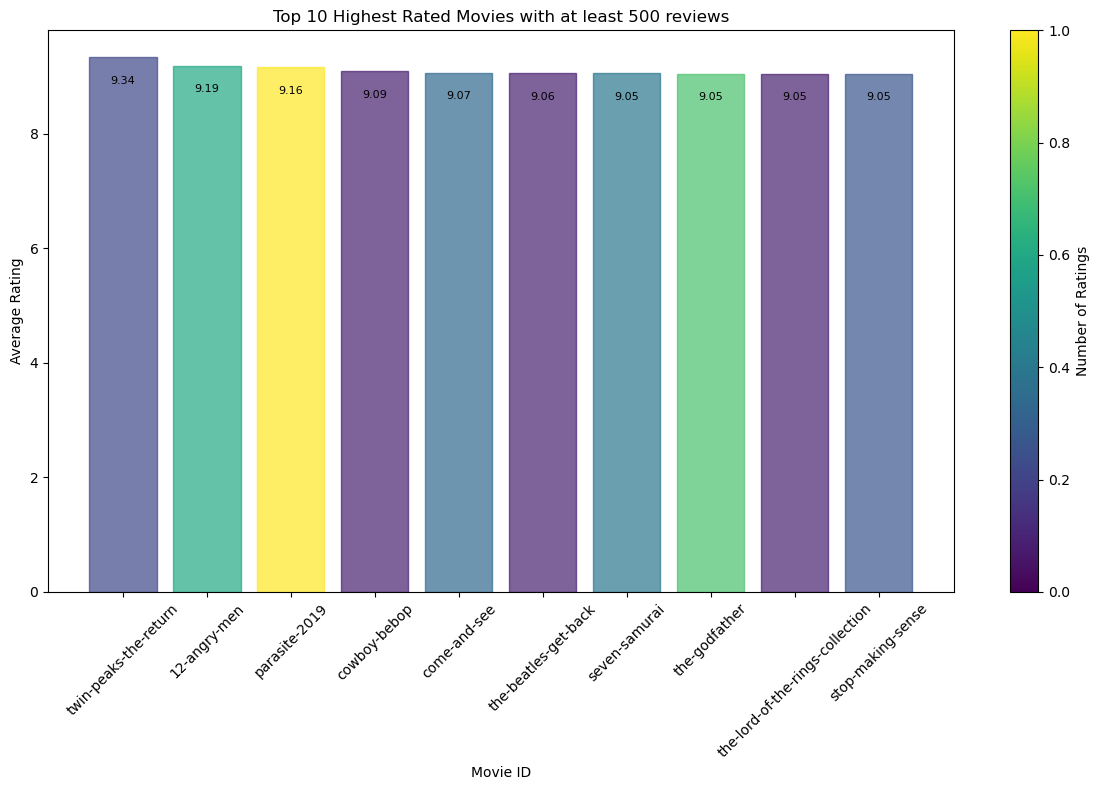

In [87]:
# Plotting the top 10 highest-rated movies with at least 100 reviews
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10.index, top_10, alpha=0.7)

# Color mapping based on number of ratings
colors = top_10_counts.values

# Adding labels with average ratings to the bars
for bar, rating in zip(bars, top_10):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, f'{rating:.2f}', ha='center', va='bottom', fontsize=8)

plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Number of Ratings')
plt.title('Top 10 Highest Rated Movies with at least 500 reviews')
plt.xlabel('Movie ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

# Setting colors for bars based on number of ratings
for bar, color in zip(bars, colors):
    bar.set_color(plt.cm.viridis(color / max(colors)))

plt.tight_layout()
plt.show()

In [98]:
# Counting the number of reviews for each movie
reviews_per_movie = ratings_df['movie_id'].value_counts()

# Sorting movies by the number of reviews and selecting the top 10 most reviewed
top_10_most_reviewed = reviews_per_movie.nlargest(10)

# Filtering the DataFrame to include only the top 10 most reviewed movies
top_10_movies = ratings_df[ratings_df['movie_id'].isin(top_10_most_reviewed.index)]

# Calculating the average rating for each of the top 10 most reviewed movies
average_ratings = top_10_movies.groupby('movie_id')['rating_val'].mean()




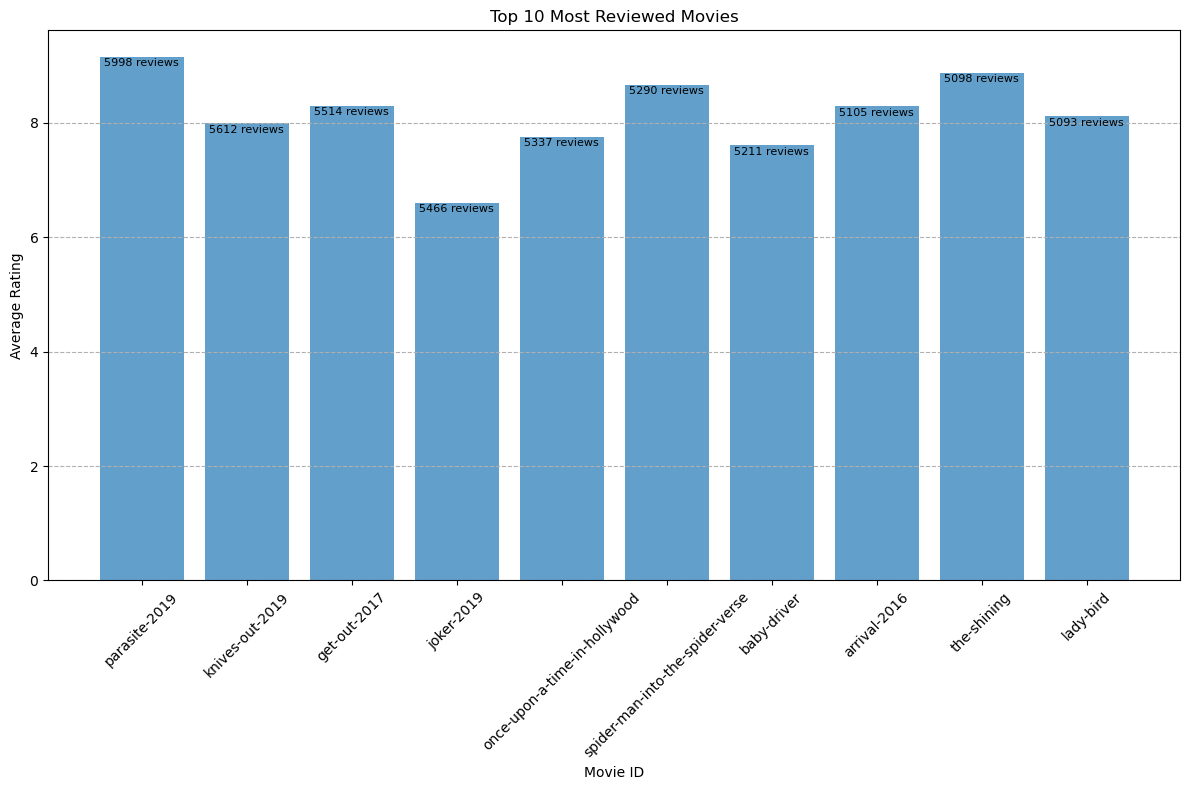

In [101]:
# Plotting the top 10 most reviewed movies
plt.figure(figsize=(12, 8))

# Bar plot where bar length represents average rating and color represents rating
bars = plt.bar(top_10_most_reviewed.index, average_ratings[top_10_most_reviewed.index], alpha=0.7)

# Adding labels with total reviews to the bars
for bar, count in zip(bars, rating_counts[top_10_most_reviewed.index]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.2, f'{count} reviews', ha='center', va='bottom', fontsize=8)

# Setting x-axis label and ticks
plt.xlabel('Movie ID')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--')
# Setting y-axis label for average rating
plt.ylabel('Average Rating')

plt.title('Top 10 Most Reviewed Movies')
plt.tight_layout()
plt.show()


In [102]:
# Counting the number of reviews per user
reviews_per_user = ratings_df['user_id'].value_counts()

# Filtering out users with more than 15000 reviews
reviews_per_user = reviews_per_user[reviews_per_user <= 15000]

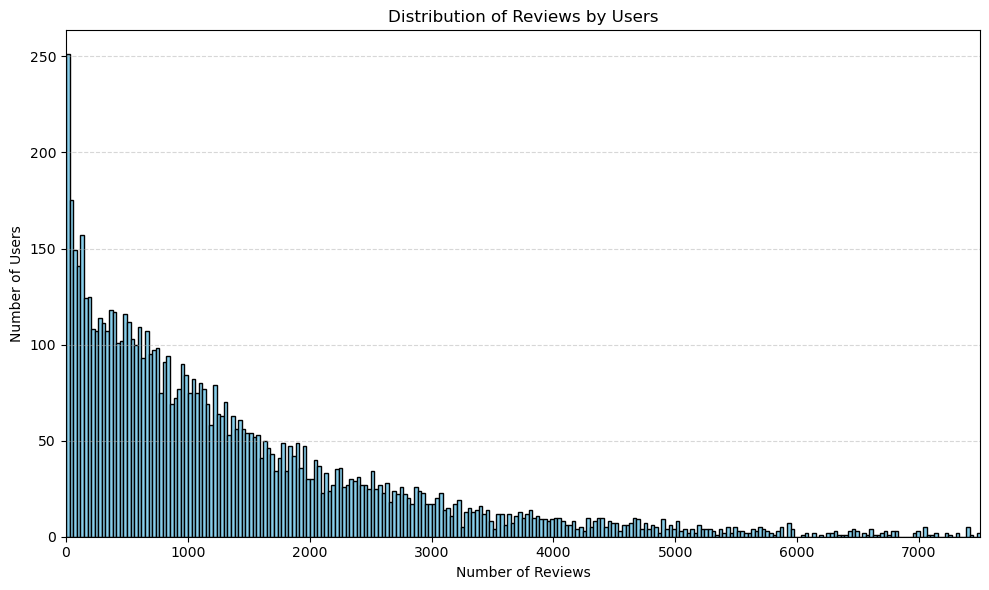

In [110]:
# Plotting the distribution of reviews by users
plt.figure(figsize=(10, 6))
plt.hist(reviews_per_user, bins=3000, color='skyblue', edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.title('Distribution of Reviews by Users')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(0, 7500)  # Limiting x-axis to focus on majority of users
plt.tight_layout()
plt.show()